<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_04/lab_04.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04



## Problema 01

<img src="http://nelsoncos.com/wp-content/uploads/2017/02/sales-icon.png" width="360" height="360" align="center"/>


EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(10,8)})

In [ ]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_04/data/company_sales_data.csv")
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

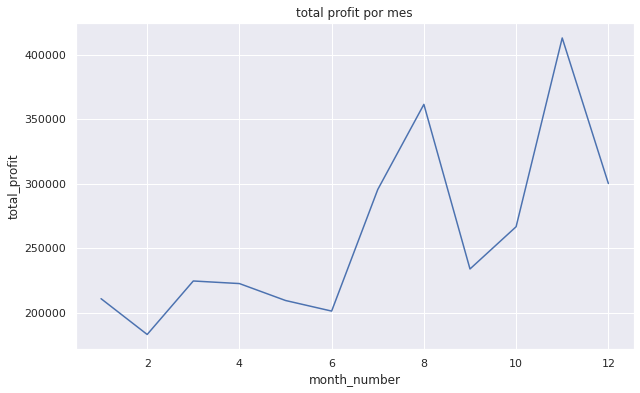

In [ ]:
plt.figure(figsize=(10,6))                                                #grafico lineal del total_profit de todos los meses
sns.lineplot(x='month_number', y='total_profit', data= df, ci= None)
plt.title("total profit por mes")
plt.show()

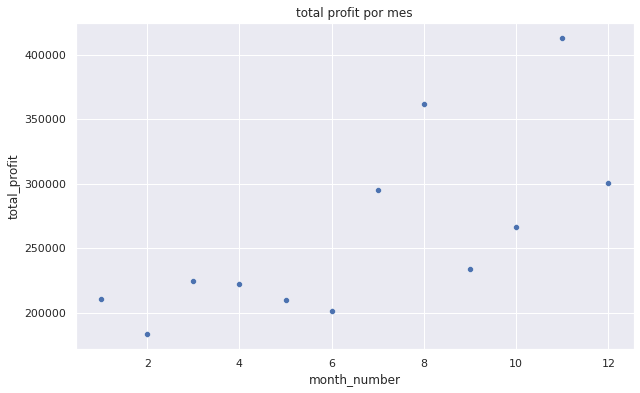

In [ ]:
plt.figure(figsize=(10,6))                                                  #grafico de dispersion del total_profit de todos los meses
sns.scatterplot(x='month_number', y='total_profit', data= df, ci= None)
plt.title("total profit por mes")
plt.show()

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

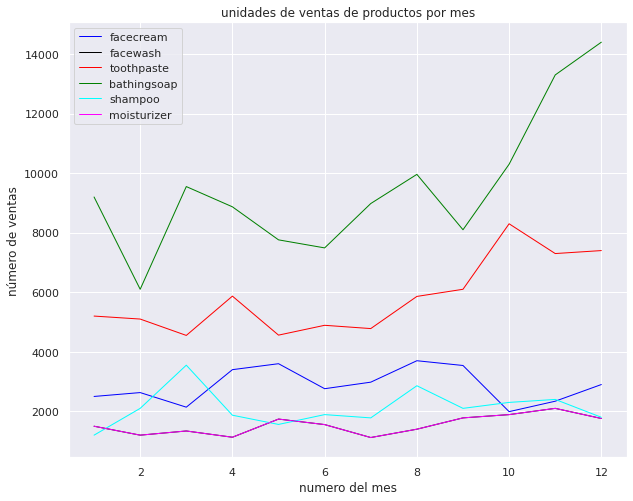

In [ ]:
#considere los datos de ventas de productos como la cantidad de cada producto por mes
plt.plot(df['month_number'], df['facecream'], label= 'facecream', color='blue', linewidth= 1)
plt.plot(df['month_number'], df['facewash'], label= 'facewash', color= 'black', linewidth=1)
plt.plot(df['month_number'], df['toothpaste'], label= 'toothpaste', color= 'red', linewidth=1)
plt.plot(df['month_number'], df['bathingsoap'], label= 'bathingsoap', color= 'green', linewidth=1)
plt.plot(df['month_number'], df['shampoo'], label= 'shampoo', color= 'cyan', linewidth=1)
plt.plot(df['month_number'], df['moisturizer'], label= 'moisturizer', color= 'magenta', linewidth=1)
plt.legend()
plt.title("unidades de ventas de productos por mes")
plt.xlabel("numero del mes")
plt.ylabel("número de ventas")
plt.show()

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

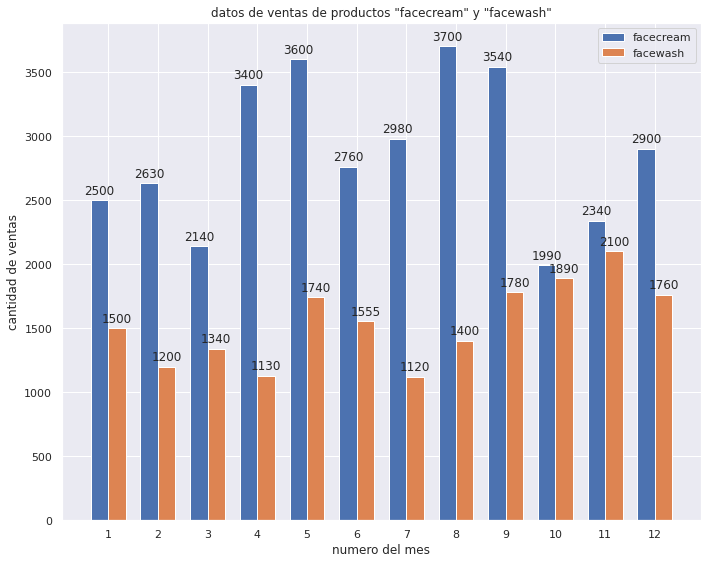

In [ ]:
labels=df['month_number']                               #obtencion de los month_number del dataframe
facecream=df['facecream']                               #datos de ventas de productos de "facecream" por mes
facewash=df['facewash']                                 #datos de ventas de productos de "facewash" por mes

x= np.arange(len(labels))                               #codigo para obtener un grafico de barras con los de ventas de productos de "facecream" y "facewash"
width= 0.35
fig, ax= plt.subplots()
recta1= ax.bar(x-width/2, facecream, width, label= 'facecream' )
recta2= ax.bar(x+width/2, facewash, width, label= 'facewash')

ax.set_xlabel('numero del mes')
ax.set_ylabel('cantidad de ventas')
ax.set_title('datos de ventas de productos "facecream" y "facewash"')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):                                   #funcion para colocar los datos numericos en cada barra del grafico
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(recta1)
autolabel(recta2)

fig.tight_layout()
plt.show()

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

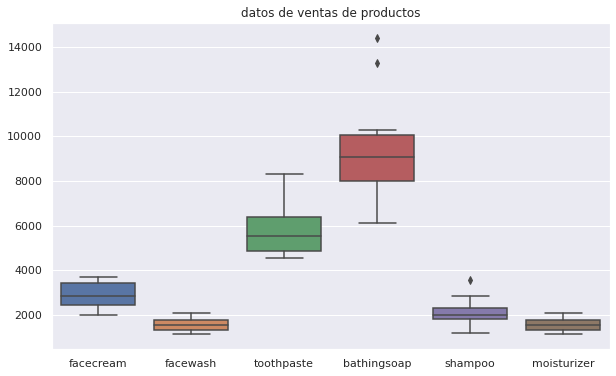

In [ ]:
datos_ventas=df.drop(['month_number', 'total_units', 'total_profit'], axis= 1)        #se consideran los datos de ventas de cada uno de los productos por mes
plt.figure(figsize=(10,6))
sns.boxplot(data=datos_ventas)
plt.title('datos de ventas de productos')
plt.show()

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

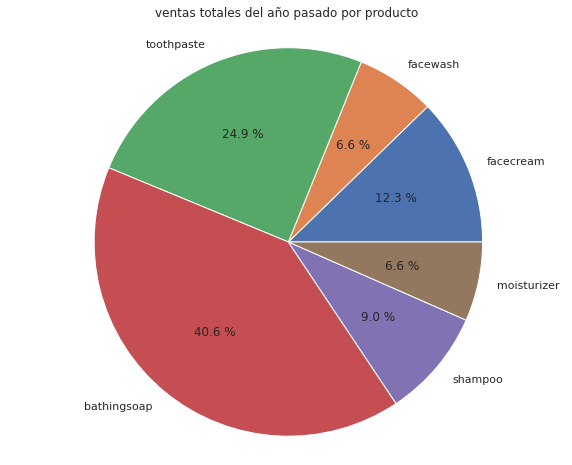

In [ ]:
#se considera que el dataframe tienen los datos de ventas del año pasado
productos=['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']
ventas_total=[df['facecream'].sum(), df['facewash'].sum(), df['toothpaste'].sum(),df['bathingsoap'].sum(),
              df['shampoo'].sum(), df['moisturizer'].sum()]
plt.pie(ventas_total, labels= productos, autopct="%0.1f %%")
plt.axis("equal")
plt.title("ventas totales del año pasado por producto")
plt.show()